<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Laboratorios_Taller/Lab07_interpolacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Laboratorio metodos computacionales, 
# Interpolacion





# 1. Movimiento de proyectiles en presencia de viento.

Supongamos que un proyectil es lanzado desde el origen con una rapidez $v=vo( \cos \theta , \sin \theta) $. Supongamos además que el efecto del viento sobre el proyectil es el de una fuerza proporcional a la velocidad relativa entre el viento y el proyectil. Teniendo presente que si $u$ es la velocidad del viento y $\alpha$ el ángulo que hace dirección de esta velocidad con el eje x, se puede entrontrar las siguientes ecuaciones diferenciales, asociada al estado de movimiento del [proyectil](https://iopscience.iop.org/article/10.1088/0143-0807/36/2/025016/meta):


\begin{equation}
m\frac{dv_x}{dt} = -mb(v_x-u\cos \alpha )
\end{equation}

\begin{equation}
m\frac{dv_y}{dt} = -mg-mb(v_x-u\sin \alpha ),
\end{equation}

donde b es el párametro de rozamiento. La soluciones a las ecuaciones anteriores vienen dadas por:

Posición en x
\begin{equation}
x=(u\cos \alpha) t + \frac{1}{b} (v_0\cos \theta_0 -u \cos\alpha)(1-\mathrm{exp}(-bt))
\end{equation}

Posicion en y 
\begin{equation}
y= \frac{1}{b}\left(\frac{g}{b}+v_0 \sin \theta_0 -u\sin\alpha \right)(1-\mathrm{exp}(-bt))-\left( \frac{g}{b}-u\sin\alpha\right)t
\end{equation}

Ver imagen:  http://www.sc.ehu.es/sbweb/fisica3/fluidos/viento/parabolico.html


0. Establezca las siguietnes condiciones inciales.

```
#Parametros iniciales

v0 = 60 #Velocidad en m/s
alpha = np.pi #Angulo del viento
theta = np.deg2rad(45) #Angulo de lanzamiento
u = v0/2             #rapidez del viento
b = 0.05             #Parametro de friccion 
g = 9.8                #Aceleracion de la gravedad m/s2

Params = (alpha, v0, b, u,g)  #Parametros en tupla.

```



1. Defina dos funciones, una para x y otra para y. 

```

#Posicion en x
def pos_x(t, theta, alpha, v0, b, u,g):
  x = #escriba aca la expresión
  return x

#Posicion en y
def pos_y(t, theta, alpha, v0, b, u,g):


  y = #escriba aca la expresión
  return y 

```

2. Construya un diccionario con las claves "X", "Y", "Tiempo"

3. Con el diccionario construya un data frame de pandas llamado df con los nombres de columnas "X", "Y", "Tiempo"  https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.from_dict.html. Defina 1000 registros para el intervalo de tiempo elegido.


4. Realice un gráfico de x como función del tiempo, de y como función del tiempo y la trayectoria de la partícula (df["X"], df["tiempo"], df["Y"]).


5. Determine el alcance máximo de la partícula, para ello tome  la solucion teórica con $y=0$, solucione numéricamente la ecuación para t y remplace este valor en la ecuación para x. Resuelvalo para $\theta=45^{o}$.  

6. Construya una  grafica del alcance máximo R como función de $\theta$, varie $\theta$  entre 10 y 90 grados cada 5 grados.

7. Realice una interpolacion de R como función de theta.











Posición en x
\begin{equation}
x=(u\cos \alpha) t + \frac{1}{b} (v_0\cos \theta_0 -u \cos\alpha)(1-\mathrm{exp}(-bt))
\end{equation}

Posicion en y 
\begin{equation}
y= \frac{1}{b}\left(\frac{g}{b}+v_0 \sin \theta_0 -u\sin\alpha \right)(1-\mathrm{exp}(-bt))-\left( \frac{g}{b}-u\sin\alpha\right)t
\end{equation}

In [ ]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
from scipy.optimize import newton
from scipy.interpolate import lagrange

In [ ]:
vo = 60 #Velocidad en m/s
alpha = np.pi #Angulo del viento
theta = np.deg2rad(45) #Angulo de lanzamiento
u = vo/2             #rapidez del viento
b = 0.05             #Parametro de friccion 
g = 9.8                #Aceleracion de la gravedad m/s2

def pos_x(t, vo, theta0, u, alpha, b, g  ):
  t1 = u*np.cos(alpha)*t  
  t2 = 1./b*(vo*np.cos(theta0)-u*np.cos(alpha))  
  t3 = (1-np.exp(-b*t))
  return t1 + t2 * t3


def pos_y(t, vo, theta0, u, alpha, b, g  ):
  t1 = (g/b + vo*np.sin(theta0) - u* np.sin(alpha) )
  t2 = (1-np.exp(-b*t)) 
  t3 = (g/b - u*np.sin(alpha))*t 
  return 1./b * t1 * t2 - t3

In [ ]:
t = np.linspace(0, 8.5, 100)
Params = (vo, theta, u, alpha, b , g)  #Parametros en tupla.
x = pos_x(t, *Params)
y = pos_y(t, *Params)

In [ ]:
dicc = {"x":x,"y":y ,"t":t}
df = pd.DataFrame(dicc)

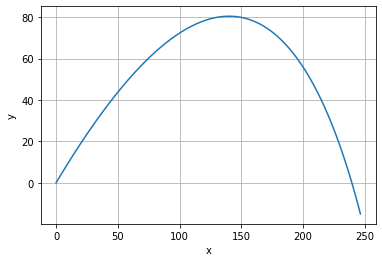

In [ ]:
plt.plot(df.x, df.y)
plt.xlabel("x")
plt.ylabel("y")
plt.grid()

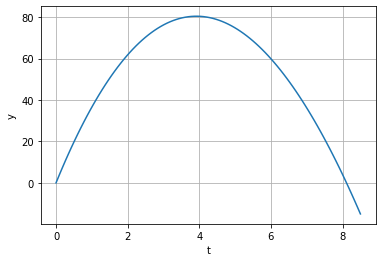

In [ ]:
plt.plot(df.t, df.y)
plt.xlabel("t")
plt.ylabel("y")
plt.grid()

In [ ]:
tv = newton(pos_y, 6.5, args=Params)
tv

8.111627022095584

In [ ]:
pos_x(tv, *Params)

239.60614945520726

# 1. Generalizacion

In [ ]:
np.arange(5, 85, 5)         # angulos en grados (°)

array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80])

In [ ]:
theta = np.deg2rad(np.arange(5, 80, 5)) #Angulo de lanzamiento en radianes
theta

array([0.08726646, 0.17453293, 0.26179939, 0.34906585, 0.43633231,
       0.52359878, 0.61086524, 0.6981317 , 0.78539816, 0.87266463,
       0.95993109, 1.04719755, 1.13446401, 1.22173048, 1.30899694])

In [ ]:
Rmax = np.zeros(len(theta))           # Inicializacion del vector que contendra la informacion del alcance maximo
for i, te in enumerate(theta):
  Params = (vo, te, u, alpha, b , g)  #Parametros en tupla.
  tv = newton(pos_y, 6.5, args = Params)
  Rmax[i] = pos_x(tv, *Params)
  #print(tv,pos_x(tv, *Params))

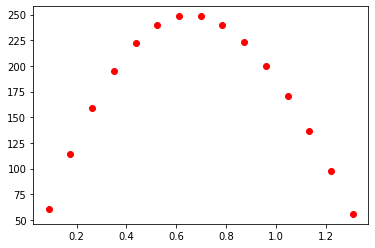

In [ ]:
# Alcance maximo como funcion de theta
plt.plot(theta, Rmax,"ro" )

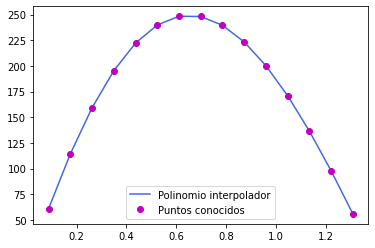

In [ ]:
# Con los puntos mostrados en la gráfica de alcance máximo como función de los ángulos de disparo, definimos uun polinomio interpolador de lagrange:

xi=theta
yi=Rmax

P = lagrange(xi,yi)

plt.plot(theta, P(xi),color='royalblue',label='Polinomio interpolador' )
plt.plot(theta, Rmax,"mo",label='Puntos conocidos' )
plt.legend()




# 2.  Interpolación lagrange

Consideremos la función: 
\begin{equation*}
     f(x) = \frac{1}{1+25x^2}
\end{equation*}
en el intervalo $[-1, 1]$, definamos un conjunto de puntos $n+1$  equiespaciados en $[-1,1]$.



###2.1. Representar gráficamente la función junto al polinomio de interpolación de Lagrange, $p_n(x)$ , para    $n=\{ 4, 8, 12, 16, 20 \}$. 

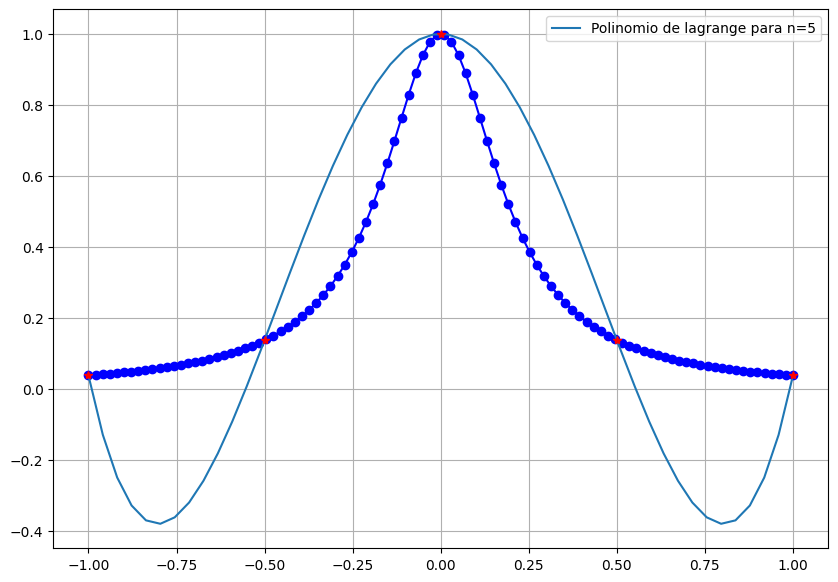

In [40]:
import sympy as sp 
import numpy as np
import matplotlib.pylab as plt
import scipy as sc


# Función simbólica:

x = sp.symbols("x")           # x será una variable simbólica
f_s = lambda x: 1/(1+25*x**2)


sp.init_printing() # Usar LaTeX para dibujar ecuaciones


# Puntos a interpolar:

N=4
n=N+1
x_n= np.linspace(-1,1,n)       


# Función numérica:

x_0=np.linspace(-1,1,100)
f_sn = sp.lambdify(x,f_s(x),'numpy')



# Polinomio interpolador.
pn=sc.interpolate.lagrange(x_n,f_sn(x_n))   


# Gráfica de ensayo:

xp= np.linspace(x_n.min(),x_n.max())   # Dominio del polinomio de lagrange

plt.figure(figsize=(10,7))
plt.plot(x_0,f_sn(x_0),'o-',color='blue')
plt.plot(xp,pn(xp),label=f'Polinomio de lagrange para n={n}')
plt.plot(x_n,f_sn(x_n),'r*')
plt.grid()
plt.legend(loc='best')




In [43]:
"""
La función Interpol_lagrange tiene los siguientes inputs y outputs:

Input:        N : = número de puntos a interpolar por el método de Lagrange.

Outputs:  xx,Pn : = Pareja ordenada de arrays que representan : -------> xx : Dominio de valores desde el minimo  hasta el máximo  del intervalo de la función original, tomando n= N+1 puntos
                                                                -------> Pn : Polinomio interpolador de Lagrange evaluado en xx

"""


def Interpol_lagrange(N):
  n=N+1
  x_n= np.linspace(-1,1,n)  
  y_n=f_sn(x_n)
  
  # Lagrange.

  Pn = sc.interpolate.lagrange(x_n,y_n)   # Constructor del Polinomio interpolador.
  xx=np.linspace(x_n.min(),x_n.max())            # Dominio donde se definira el polinomio interpolador de lagrange 
  

  return xx , Pn

  




  


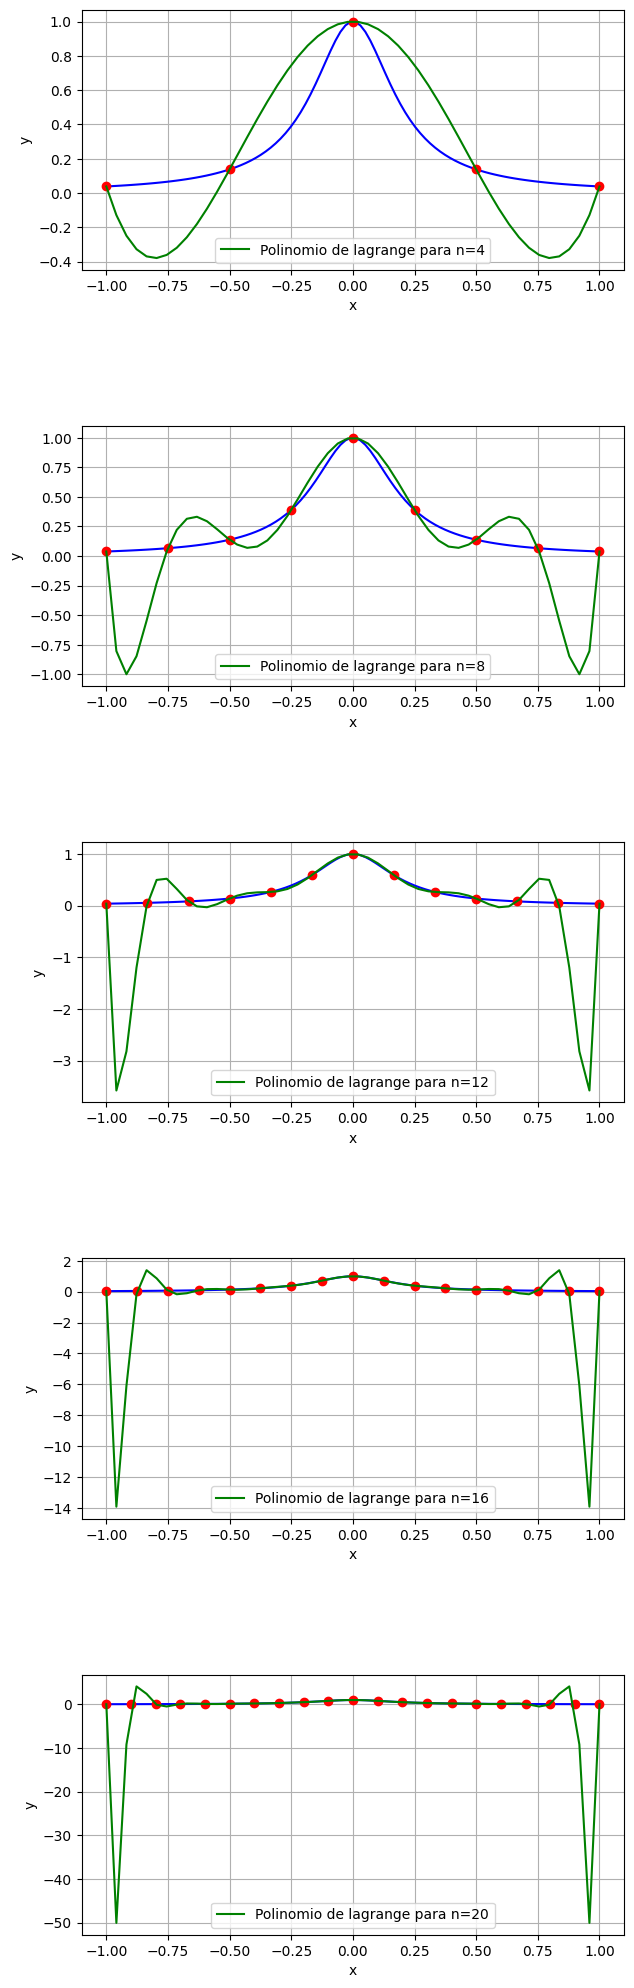

In [44]:

NN=[4,8,12,16,20]

# Multiples gráficas:

i= 0
fig, axs = plt.subplots(figsize=(7,25),nrows=5,ncols=1)

for j in range(len(NN)):
  
  ax=axs.flatten()
  ax[j].grid()
  ax[j].plot(x_0,f_sn(x_0),color='blue')

  N=NN[j]


  x_n= np.linspace(-1,1,N+1)  
  ax[j].plot(x_n,f_sn(x_n),'ro')


  xx,P= Interpol_lagrange(N)

  ax[j].plot(xx,P(xx),'g-',label=f'Polinomio de lagrange para n={N}')
  ax[j].set_xlabel('x')
  ax[j].set_ylabel('y')
  ax[j].legend()
  

fig.subplots_adjust(wspace=0.3)
fig.subplots_adjust(hspace=0.6)

###2.2. Comprobar gráficamente cómo el error aumenta con $n$. Emplee la libreria, simbolica de sympy y encuente el error en la interpolación.
 
 Para este numeral, emplee que: 
 
 
La cota del  error , viene dado por: 
\begin{equation}
f(x) - P(x) = \epsilon = \frac{1}{(n+1)!} f^{(n+1)}(\xi)(x - x_0)(x - x_1) ... (x - x_n)
\end{equation}, emplee la libreria simbolica para realizar la estimación de dicha cuota, sólo para n = 4, en el punto 0.5

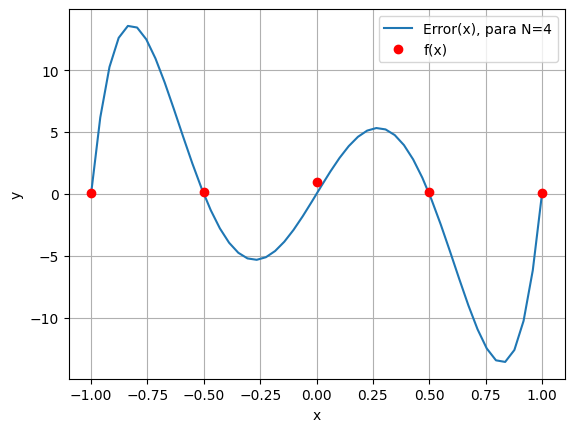

In [53]:
#Ayuda: 

import sympy as sp # Cargamos sympy como sp
import numpy as np
import matplotlib.pylab as plt

sp.init_printing() # Usar LaTeX para dibujar ecuaciones

N=4
x = sp.symbols("x") # x será una variable simbólica
f_s = lambda x: 1/(1+25*x**2)

fns=sp.diff(f_s(x),x,N)


# Función numérica y su derivada de interes:
x_0=np.linspace(-1,1,100)
f_sn = sp.lambdify(x,f_s(x),'numpy')
fnn = sp.lambdify(x,fns,'numpy')
M=np.max(fnn(x_0))


# Puntos a interpolar:
N=4
n=N+1
x_n= np.linspace(-1,1,n) 
y_n= f_sn(x_n)



# Polinomio de lagrange :
P=sc.interpolate.lagrange(x_n,y_n)



# Construcción de la cota de error:

N=4
n=N+1
x_n= np.linspace(-1,1,n) 









def E(x):                                # Error del polinomio interpolador de lagrange
  x_n= np.linspace(-1,1,n) 
  p=1
  for j in range(len(x_n)):
    p = p*(x- x_n[j])

  ϵ=  ((M)/np.math.factorial(n))*p
  return ϵ



plt.plot(xx,E(xx),label=f'Error(x), para N={N}')
plt.plot(x_n,f_sn(x_n),'ro',label='f(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()



In [46]:
f5 = sp.diff(f_s(x),x, 5)
fxn5 = sp.lambdify(x,f5,'numpy') #numpy funcion

x_ = np.linspace(-1, 1, 100)


# 3.  Interpolación Hermite

Consideremos la función: 
\begin{equation*}
     f(x) = \frac{1}{1+25x^2}
\end{equation*}
en el intervalo $[-1, 1]$, definamos un conjunto de puntos $n+1$  equiespaciados en $[-1,1]$.

 1. Representar gráficamente la función junto al polinomio de interpolación de Lagrange, $p_n(x)$, para $n=\{ 4, 8, 12, 16, 20 \}$. 
 2. Comprobar gráficamente cómo el error aumenta con $n$. Emplee la libreria, simbolica de sympy y encuente el error en la interpolación.
 
 Para este numeral, emplee que: 
 
 
La cota del  error , viene dado por: 

$$
  f(x)-p_{2n+1}(x)
  = \frac{f^{2n+2}(\xi)}{(2n+2)!} (x-x_0)^2(x-x_1)^2(x-x_2)^2,
$$





emplee la libreria simbolica para realizar la estimación de dicha cuota, sólo para n = 4, en el punto 0.5


In [1]:
import sympy as sp 
import numpy as np
import matplotlib.pylab as plt
import scipy as sc

N=4
n=N+1

j= 5 # numero de puntos

# Función simbólica:
x = sp.symbols("x")           # x será una variable simbólica
f_s = lambda x: 1/(1+25*x**2)



# Derivada simbólica:

f1s=sp.diff(f_s(x),x)
Ds=sp.diff(f_s(x),x,n)




# Función y derivada numérica:

fn  = sp.lambdify(x,f_s(x),'numpy')
f1n = sp.lambdify(x,f1s,'numpy')
Dn  = sp.lambdify(x,Ds,'numpy')

# Intervalo de valores y puntos a interrpolar:

N=4
n=N+1

x0=np.linspace(-1,1,100)
xn=np.linspace(-1,1,n)
xp=np.linspace(xn.min(),xn.max())


yn=fn(xn)
y1n=f1n(xn)



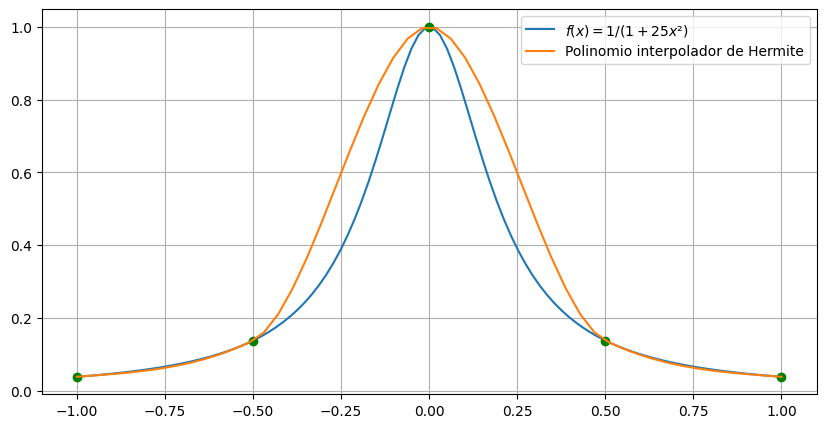

In [2]:
# Interpolacion de Hermite

H=sc.interpolate.CubicHermiteSpline(xn,yn,y1n)


# Grafico de ensayo:
plt.figure(figsize=(10,5))
plt.plot(x0,fn(x0),label='$ f(x)=1/(1+25x²)$')
plt.plot(xn,fn(xn),'go')
plt.plot(xp,H(xp),label='Polinomio interpolador de Hermite')
plt.grid()
plt.legend()

In [10]:
"""
función Interpol_Hermite:

Input:        N : = número de puntos a interpolar por el método de Lagrange.

Outputs:  xr,Hr : = Pareja ordenada de arrays que representan : -------> xr : Dominio de valores desde el minimo  hasta el máximo  del intervalo de la función original, tomando n= N+1 puntos
                                                                -------> Hr : Polinomio interpolador de Hermite evaluado en xx

"""


def Interpol_Hermite(N):
  n=N+1
  x_n= np.linspace(-1,1,n)                # Array de n puntos equiespaciados  en el intervalo [-1,1]
  y_n=fn(x_n)  
  y1_n=f1n(x_n)                       # Función de interes evaluada en los puntos de la linea anterior
  
  # Hermite.

  Hr = sc.interpolate.CubicHermiteSpline(x_n,y_n,y1_n)   # Constructor del Polinomio interpolador.
  xr=np.linspace(x_n.min(),x_n.max())                # Dominio donde se definirá el polinomio interpolador de Hermite
  

  return xr , Hr

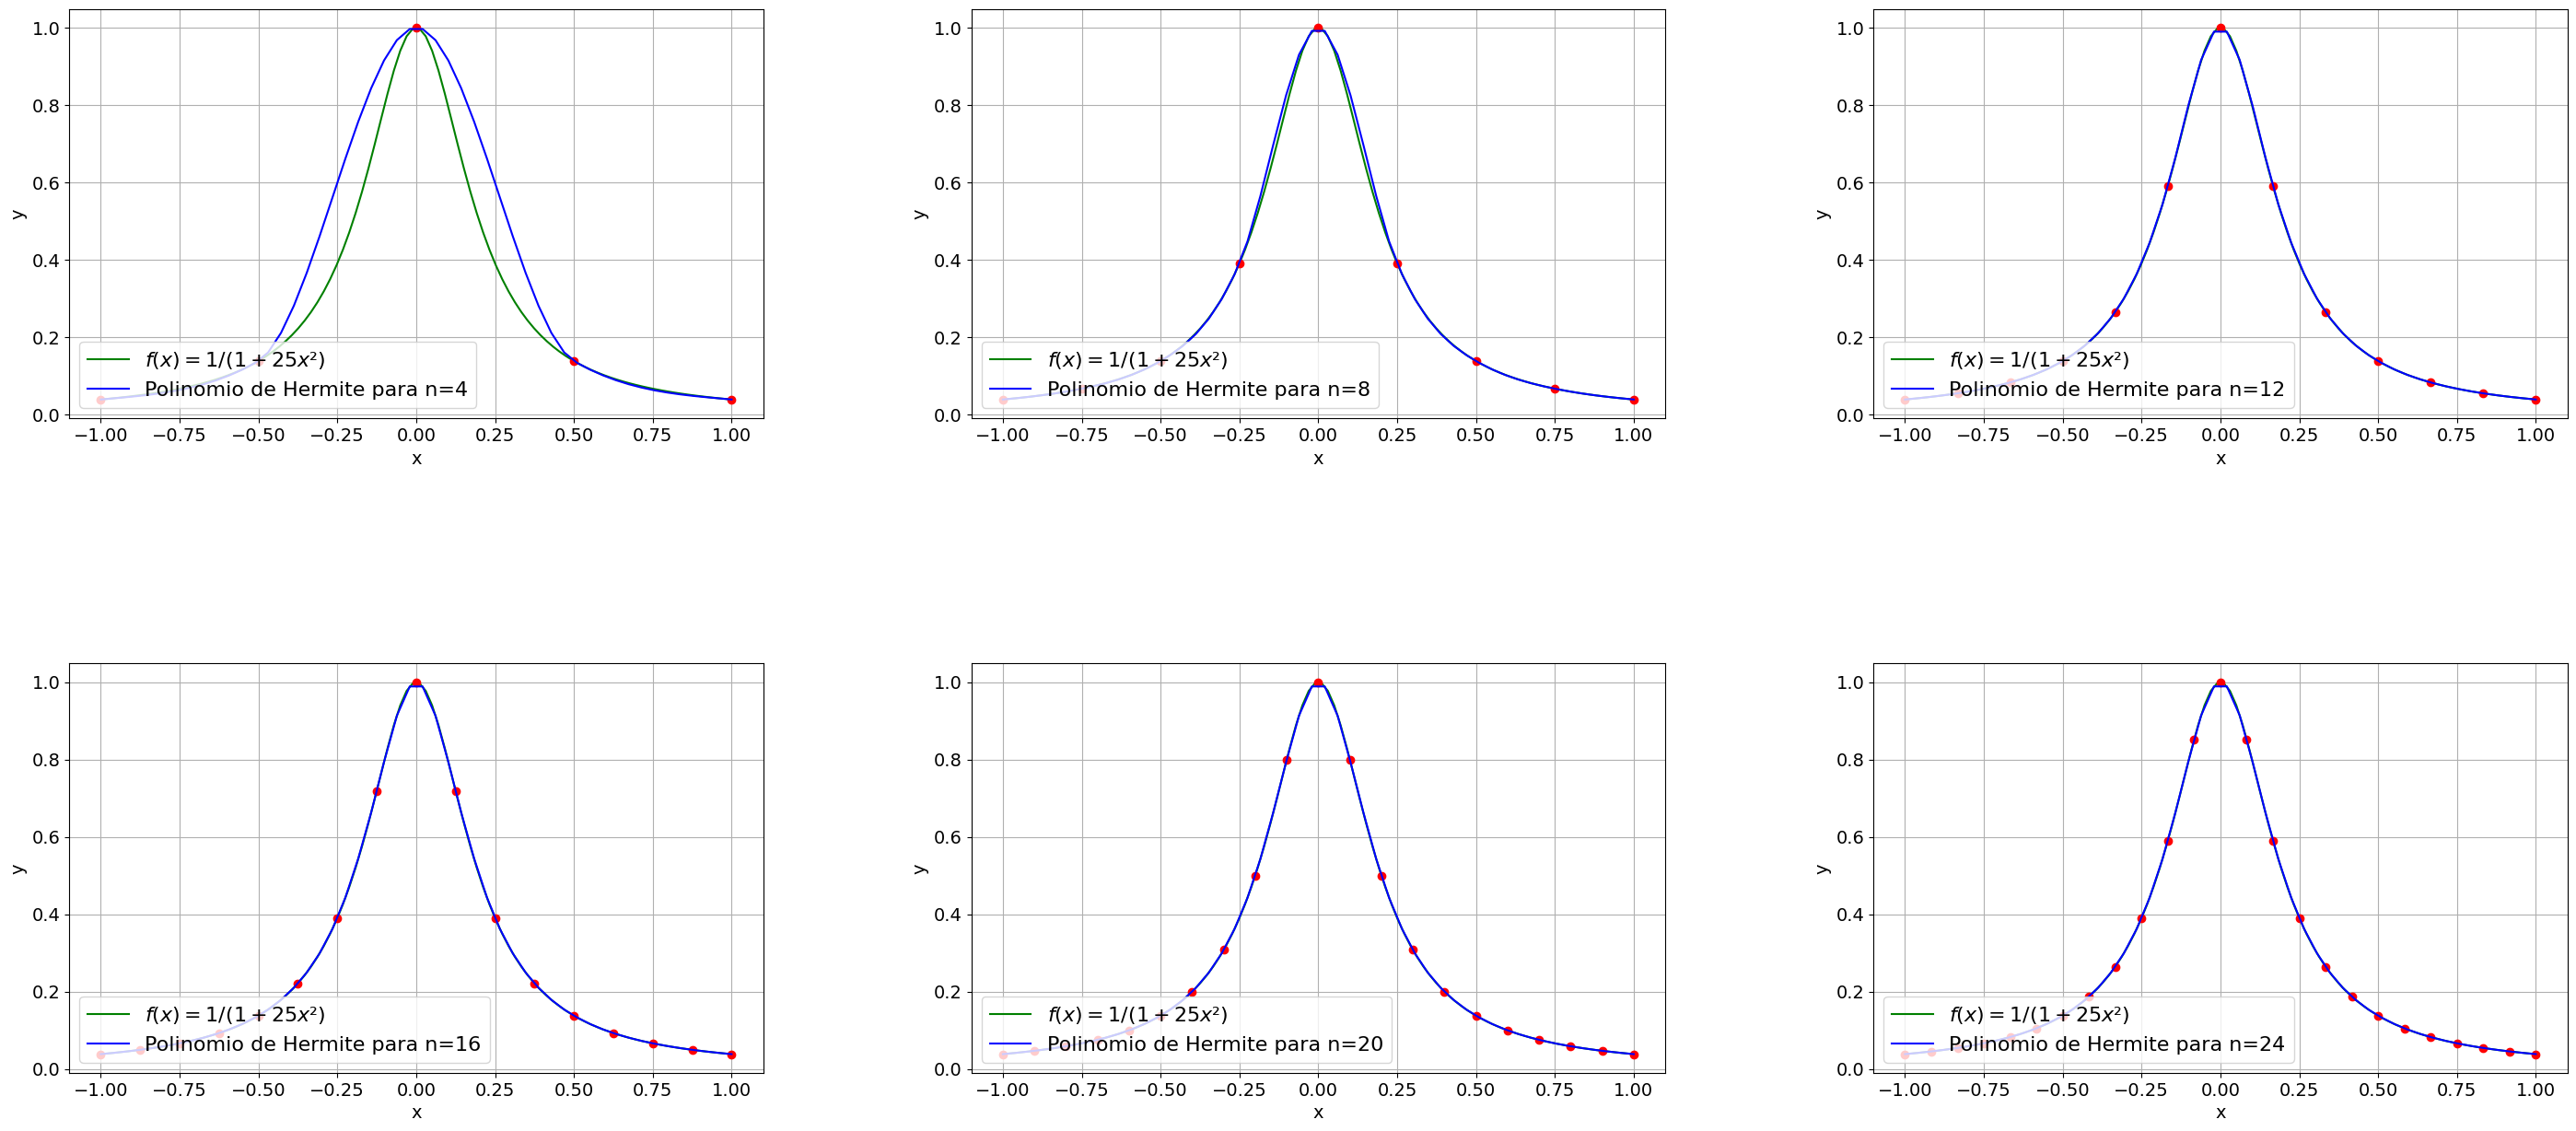

In [38]:
listN=[4,8,12,16,20,24]

# Multiples gráficas:

i= 0
fig, axs = plt.subplots(figsize=(35,15),nrows=2,ncols=3)

for j in range(len(listN)):
  
  ax=axs.flatten()
  ax[j].grid()
  ax[j].plot(x0,fn(x0),color='green',label='$ f(x)=1/(1+25x²)$')

  N=listN[j]


  x_n= np.linspace(-1,1,N+1)  
  ax[j].plot(x_n,fn(x_n),'ro')


  xr,Hr= Interpol_Hermite(N)

  ax[j].plot(xr,Hr(xr),'b-',label=f'Polinomio de Hermite para n={N}')
  ax[j].set_xlabel('x',fontsize=14)
  ax[j].set_ylabel('y',fontsize=14)

  ax[j].tick_params(axis="x", labelsize=14)
  ax[j].tick_params(axis="y", labelsize=14)

 
  
  leg = ax[j].legend(loc='lower left',prop={"size":16})

fig.subplots_adjust(wspace=0.3)
fig.subplots_adjust(hspace=0.6)

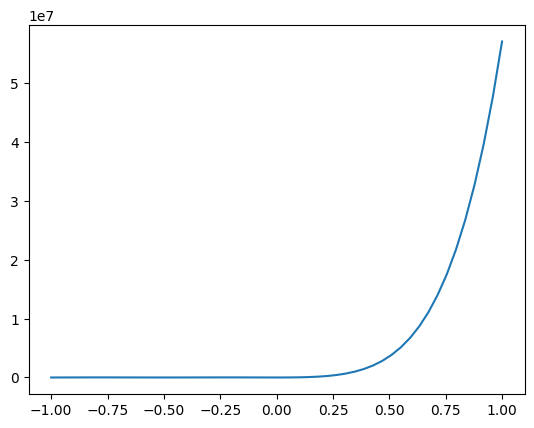

In [39]:
# Calculo del error en la interpolacion de Hermite:

N=4
n=N+1


x0=np.linspace(-1,1,100)
xn=np.linspace(-1,1,n)
xp=np.linspace(xn.min(),xn.max())


M= np.max(Dn(x0))
d=np.math.factorial(2*N +2)

e= lambda x: (M* ((x-xn[0])**2 ) * ((x-xn[1])**2) * ((x-xn[2])**2))/d


plt.plot(xp,e(xp),label='error de Hermite')
#plt.plot(xn,f_s(xn),'bo')


# 4. Spline Cúbico

Consideremos la imagen ![paloma](https://github.com/hernansalinas/autogrades/blob/main/Laboratorios_Taller/img/paloma.png?raw=true).




Con los datos dados en la tabla:

1. Representar gráficamente la imagen, usando las órdenes `imread` e `imshow` de python (estas órdenes están contenidas en el paquete `matplotlib`) 

2. Definir una lista de puntos, $x_i$,$y_i$ de la paloma.

3. Representar el polinomio de interpolación de Lagrange en estos puntos, para aproximar el dibujo.

4. Repetir el proceso de interpolación mediante *splines* cúbicos. Para ello, utilizar la función `CubicSpline` (contenida en `scipy.interpolate`), 


5. Comparar los resultados. ¿Alguna de las interpolaciones presenta oscilaciones? ¿A qué se debe este fenómeno?

Ref: Metodos numericos, Burden.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
import requests
from PIL import Image
from io import BytesIO

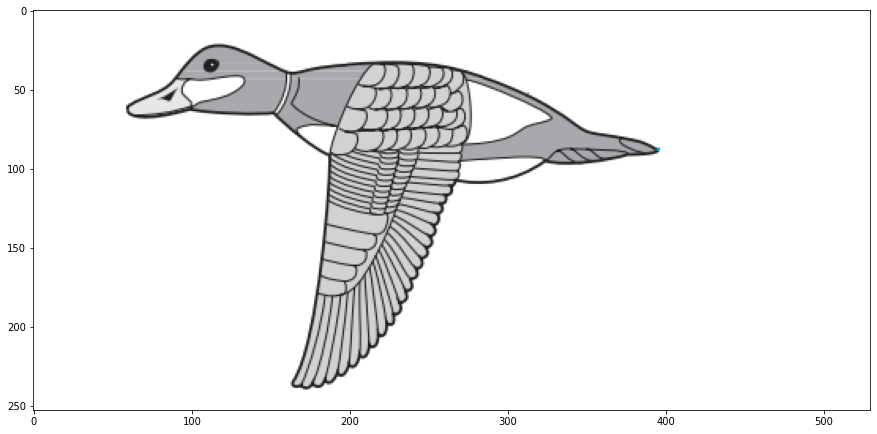

In [ ]:
url ='https://raw.githubusercontent.com/satorresa666/Data-for-comp.meth./main/paloma.png?token=GHSAT0AAAAAACAUQUNPUZU6D66NJRRYXSXAZBBZ3VQ'
url="https://github.com/satorresa666/Data-for-comp.meth./blob/main/pato.jpg?raw=true"
url='https://raw.githubusercontent.com/satorresa666/Data-for-comp.meth./main/paloma.png?token=GHSAT0AAAAAACAUQUNO6UXMGI6DZ4MPGNP6ZBB2I5A'

response=requests.get(url)
imag =Image.open(BytesIO(response.content))
pato =np.array(imag)
plt.figure(figsize=(15,15))
plt.imshow(imag)

In [ ]:
imag =Image.open(BytesIO(response.content))

In [ ]:
# Supongamos que los puntos dados en la tabla se ajustan al borde del dibujo del pato:

xk=np.array([62,68,86,90,104,110,139,156,161,169,183,224,255,278,313,329,337,346,360,372,381,396])
yk=np.array([60,57,48,43,27,24,29,37,39,39,37,34,35,40,53,63,67,75,79,80,82,88])




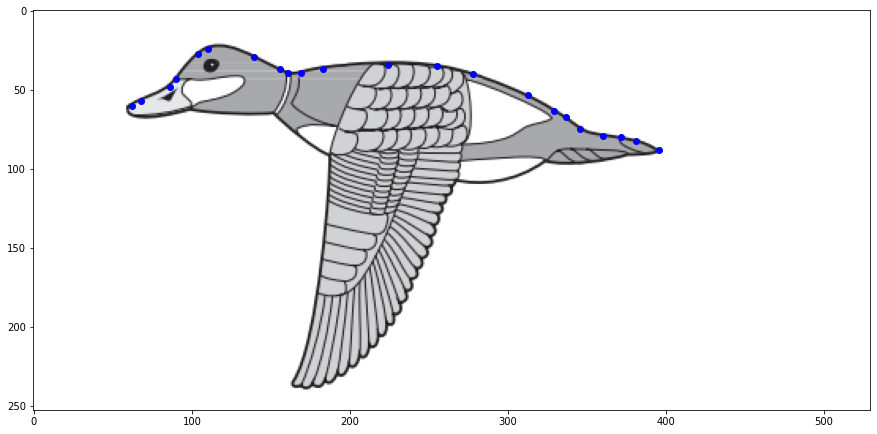

In [ ]:
plt.figure(figsize=(15,10))
plt.imshow(imag)

plt.plot(xk,yk,'bo')






In [ ]:
# Definamos un polinomio de interpolación de lagrange para aproximar el perfil superior del pato;


xp= np.linspace(xk.min(),xk.max())
Pl= sc.interpolate.lagrange(xk,-yk)

plt.figure(figsize=(15,10))
plt.imshow(imag)

plt.plot(xp,Pl(xp),color='lawngreen',linewidth=2)
plt.plot(xk,yk,'bo')
plt.plot(xp,Pl(xp))

 Observamos que el resultado es desastroso; el polinomio interpolante termina saliéndose del marco de la imagen y no logra describir el borde superior del pato.
Esto es consecuencia del fenómeno de Runge, según el cual la convergencia de los polinomios interpolantes de lagrange falla cuando la cantidad de puntos de interés es lo suficientemente grande o la separacion entre cada punto aledaño es relativamente pequeña.
Esto se refleja en las oscilaciones que tiene la curva entre los puntos cercanos y el salto que da casi al infinito en el último punto.

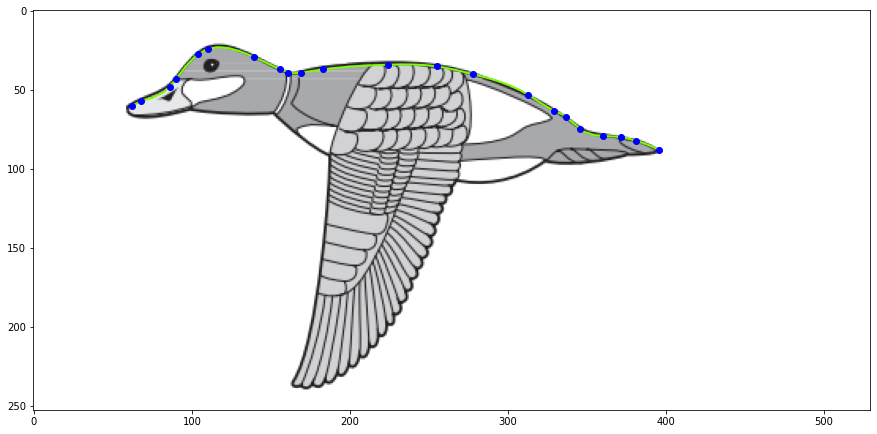

In [ ]:
# Definamos un polinomio cúbico, mediante la funcion CubicSpline que nos permita generar una curva suave que logre unir con una mayor precisión los puntos del lomo del pato:

xp= np.linspace(xk.min(),xk.max())
spline_cubico= sc.interpolate.CubicSpline(xk,yk)


plt.figure(figsize=(15,10))
plt.imshow(imag)

plt.plot(xp,spline_cubico(xp),color='lawngreen',linewidth=2)
plt.plot(xk,yk,'bo')

# 5. Ejercicios de Repaso

En la teoria de campo medio, La magnetización, como función de la temperatura de un material magnético,  puede ser calculada como:

\begin{equation}
m(T) = \tanh\left( \frac{m(T)}{T} \right)
\end{equation}

donde \$m\$  y \$T\$ son la magnetizacion y temperatura reducida, respectivamente

Para    \$T\$ = 0.5, determine:

a. La magnetización reducida empleando el método de la secante (Muestre su resultado con 4 cifras)

b. Valide su respuestado con el método de punto fijo
(Muestre su resultado con 4 cifras)

c. Defina T = np.linspace(0.1,0.99,100), y emplee el método de la secante para construir un gráfico de magnetización reducida como función de la temperatura para los  100 valores  de T.


d. Para los 100 puntos anteriores, emplee el método de interpolación de Lagrange y Cubic-Spline. 
Realizar una gráfica mostrando los puntos y el polinomio de interpolación para cada unos de los métodos.
¿Que puede concluir de los metodos?

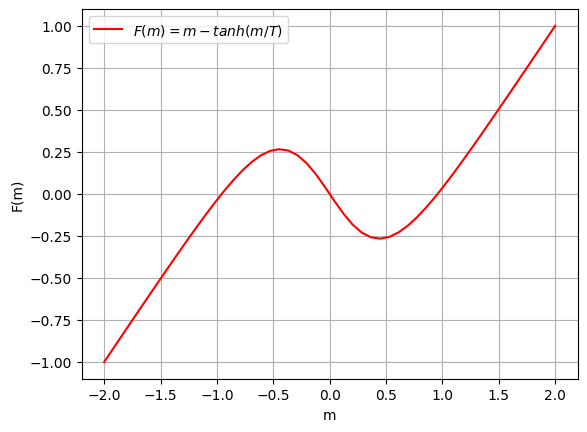

In [54]:
# librerias a utilizar
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt


# a) Definimos la función asociada a la ecuación de la magnetización como función de la temperatura, para la cual encontraremos su raíz, cuyo valor debe ser la misma magnetización en la temperatura dada :


#F= lambda m: m - np.tanh(m/T)


T=0.5
def F(m):
  m_T = m - np.tanh(m/T)
  return m_T



xm= np.linspace(-2,2)
plt.plot(xm,F(xm),color='red',label='$F(m)=m-tanh(m/T)$')
plt.xlabel('m')
plt.ylabel('F(m)')
plt.grid()
plt.legend()


In [55]:
# Metodo de la secante; Supongamos que m>0:

m_sec=sc.optimize.newton(F,1)
print( f'm(T={T})= ' f'{m_sec:.4f}')

m(T=0.5)= 0.9575


In [56]:
# Método del punto fijo :
F_aux = lambda m: m - F(m) 

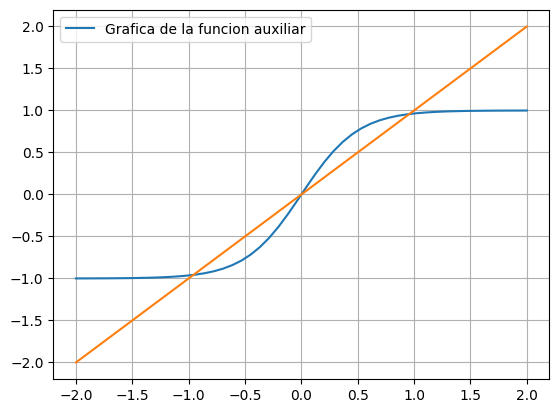

In [57]:
xm= np.linspace(-2,2)
plt.plot(xm,F_aux(xm),label='Grafica de la funcion auxiliar')
plt.plot(xm,xm)
plt.grid()
plt.legend()

In [58]:
m_pf=sc.optimize.fixed_point(F_aux,1)
print( f'm(T={T})= ' f'{m_pf:.4f}')

m(T=0.5)= 0.9575


In [59]:
# Definamos T = np.linspace(0.1,0.99,100)

T = np.linspace(0.1,0.99,100)

# Para cada valor de temperatura contenido en T, encontraremos la respectiva imagen m(T) que nos permita graficar la magnetizacion como función de la temperatura reducida:

m_T=np.zeros(len(T))


for i in range(len(T)):

  F = lambda k:  k- np.tanh(k/T[i])
  m_val= sc.optimize.newton(F,1)
  m_T[i]=m_val




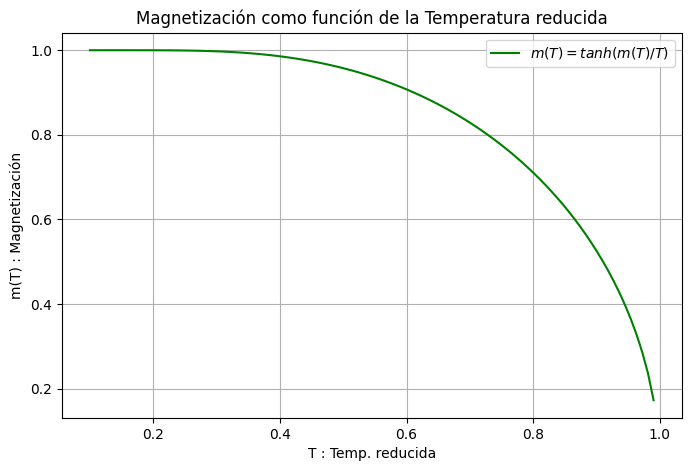

In [61]:
plt.figure(figsize=(8,5))
plt.plot(T,m_T,color='green',label='$m(T) = tanh(m(T) / T  )$')
plt.title('Magnetización como función de la Temperatura reducida')
plt.xlabel('T : Temp. reducida')
plt.ylabel('m(T) : Magnetización')
plt.legend()
plt.grid()